## 1. Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split

import scipy as sc
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cc_apps = pd.read_csv("/content/drive/MyDrive/ML Learning csv/UCI_crx.csv")

In [ ]:
cc_apps.head()

,Gender,Age,Debt,Married,Bank Customer,Education level,Ethinicity,Years employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zipcode,Income,Approval status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


## 2. Inspecting the applications
The features in the typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. 

<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features.

In [ ]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
cc_apps.tail(17)

             Debt  Years employed  Credit Score         Income
count  690.000000      690.000000     690.00000     690.000000
mean     4.758725        2.223406       2.40000    1017.385507
std      4.978163        3.346513       4.86294    5210.102598
min      0.000000        0.000000       0.00000       0.000000
25%      1.000000        0.165000       0.00000       0.000000
50%      2.750000        1.000000       0.00000       5.000000
75%      7.207500        2.625000       3.00000     395.500000
max     28.000000       28.500000      67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   Bank Customer    690 non-null    object 
 5  

,Gender,Age,Debt,Married,Bank Customer,Education level,Ethinicity,Years employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zipcode,Income,Approval status
673,?,29.5,2.000,y,p,e,h,2.000,f,f,0,f,g,256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,0,0,-
680,b,19.5,0.290,u,g,k,v,0.290,f,f,0,f,g,280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,140,2,-


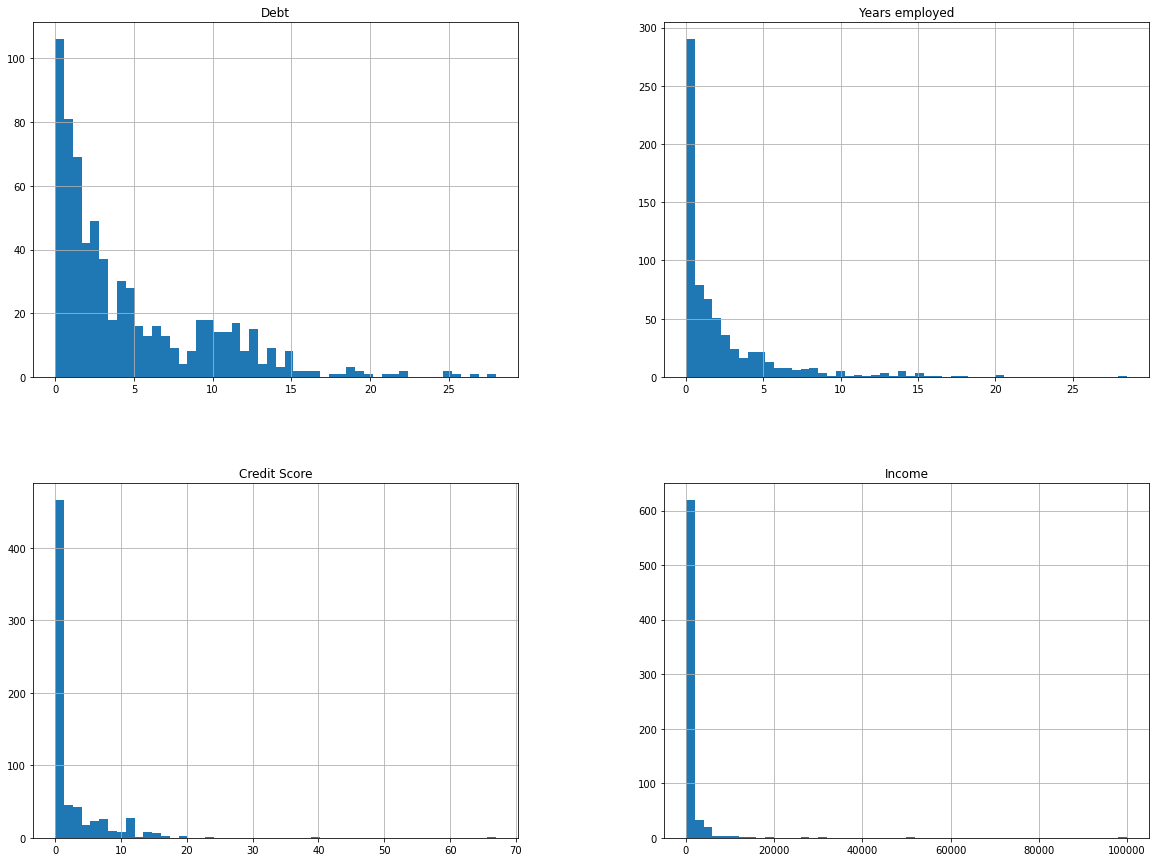

In [ ]:
#plot a histogram for each numerical attribute
%matplotlib inline  
import matplotlib.pyplot as plt
cc_apps.hist(bins=50, figsize=(20,15))
plt.show()

## 3. Handling the missing values
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>

<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [ ]:
# Import numpy
import numpy as np
# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace('?', np.NaN)

# Inspect the missing values again
cc_apps.tail(17)

    Gender    Age    Debt Married Bank Customer Education level Ethinicity  \
673      ?   29.5   2.000       y             p               e          h   
674      a  37.33   2.500       u             g               i          h   
675      a  41.58   1.040       u             g              aa          v   
676      a  30.58  10.665       u             g               q          h   
677      b  19.42   7.250       u             g               m          v   
678      a  17.92  10.210       u             g              ff         ff   
679      a  20.08   1.250       u             g               c          v   
680      b   19.5   0.290       u             g               k          v   
681      b  27.83   1.000       y             p               d          h   
682      b  17.08   3.290       u             g               i          v   
683      b  36.42   0.750       y             p               d          v   
684      b  40.58   3.290       u             g               m 

,Gender,Age,Debt,Married,Bank Customer,Education level,Ethinicity,Years employed,Prior Default,Employed,Credit Score,Drivers License,Citizen,Zipcode,Income,Approval status
673,NaN,29.5,2.000,y,p,e,h,2.000,f,f,0,f,g,256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,0,0,-
680,b,19.5,0.290,u,g,k,v,0.290,f,f,0,f,g,280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,140,2,-


## 4. Handling the missing values (part ii)
Ignoring missing values can affect the performance of a machine learning model heavily.
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [ ]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
cc_apps.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Gender             12
Age                12
Debt                0
Married             6
Bank Customer       6
Education level     9
Ethinicity          9
Years employed      0
Prior Default       0
Employed            0
Credit Score        0
Drivers License     0
Citizen             0
Zipcode            13
Income              0
Approval status     0
dtype: int64

## 5. Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns.
<p>We are going to impute these missing values with the most frequent values as present in the respective columns.

In [ ]:
# Iterate over each column of cc_apps
for col in cc_apps.columns:
    # Check if the column is of object type
    if cc_apps[col].dtype == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
cc_apps.isnull().sum()

Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education level    0
Ethinicity         0
Years employed     0
Prior Default      0
Employed           0
Credit Score       0
Drivers License    0
Citizen            0
Zipcode            0
Income             0
Approval status    0
dtype: int64

## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model.

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns.values:
    # Compare if the dtype is object
    if cc_apps[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
bestfeatures = SelectKBest(score_func=chi2, k=11)

In [ ]:
# Create feature and target variable for Classification problem
#From here we shall select the best 11 variables and drop 2
X_class=cc_apps.iloc[:,0:13]
X_class= cc_apps.drop('Approval status', axis=1)

In [ ]:
y_class = cc_apps['Approval status']

In [ ]:
fit=bestfeatures.fit(X_class,y_class)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_class.columns)

In [ ]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 11 best features

              Specs          Score
14           Income  567228.629561
10     Credit Score    1121.332987
1               Age     752.546126
7    Years employed     360.893186
8     Prior Default     170.746388
2              Debt     152.699990
13          Zipcode     125.013967
9          Employed      82.965844
5   Education level      34.320184
12          Citizen      12.338646
4     Bank Customer      12.221009


In [ ]:
# Best features include:age,debt,bank customer,educationlevel,yearsemployed,default,employed,creditscore,driverslicense,zipcode,income

In [ ]:
print(X_class[:5])

   Gender  Age   Debt  Married  Bank Customer  Education level  Ethinicity  \
0       1  156  0.000        2              1               13           8   
1       0  328  4.460        2              1               11           4   
2       0   89  0.500        2              1               11           4   
3       1  125  1.540        2              1               13           8   
4       1   43  5.625        2              1               13           8   

   Years employed  Prior Default  Employed  Credit Score  Drivers License  \
0            1.25              1         1             1                0   
1            3.04              1         1             6                0   
2            1.50              1         0             0                0   
3            3.75              1         1             5                1   
4            1.71              1         0             0                0   

   Citizen  Zipcode  Income  
0        0       42       0  
1       

In [ ]:
cc_apps = cc_apps.drop(columns=['Drivers License', 'Gender'])
cc_apps = cc_apps.values


Proposed approach

1. Potential techniques - What different techniques should be explored?

    This is a classification problem where the aim of the exercise is to predict, recognize and group applicants into two buckets (i.e 1 or 0) that represent clients that the bank should reject or approve for credit cards.
    Popular classification algorithms include Logistic Regression, XG Boost, Decision Tree, Support Vector Machines, etc. These algorithms are used to develop models based on trainig data to be used to predict the likelihood that subsequent data points will fall into predetermined categories.

2. Overall solution design - What is the potential solution design?

    The solution is to split the data into a train and test set with preferrably a 67-33 split between train and test sets. The classification model will be trained on the train set to build a model with high enough predictive power. The accuracy of the model is tested on the test set and recalibrated until the accuracy is high enough and acceptable.

3. Measures of success - What are the key measures of success?

    The success of this model will be measured by having a high Recall score. The greater the Recall score, higher the chances of minimizing False Negatives.

    If we fail to predict the people who should be approved for a credit card, it would cost the banks a lot of money and it would be a prudent to higlight potential defaults even if there is slight doubt.



## 7. Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Segregate features and labels into separate variables
X,y = cc_apps[:,0:12] , cc_apps[:,13]

#X- These are our features 
#Y-This is the target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

## 8. Preprocessing the data (part ii)
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## 9. Fitting a logistic regression, LGBM, XG Boost model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task.Our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>

<p>Which model we pick will depend on the performance affecting training and fitting the data

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

In [ ]:
#Fitting LGBM

import lightgbm as lgb
clf = lgb.LGBMClassifier()


# Fit logreg to the train set
clf.fit(rescaledX_train,y_train)

LGBMClassifier()

In [ ]:
#Fitting XGB

from xgboost import XGBClassifier
clf2 = XGBClassifier()

# Fit logreg to the train set
clf2.fit(rescaledX_train,y_train)

XGBClassifier()

## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. 

In this case we shall evaluate the model using different classifiers

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8377192982456141
[[93 10]
 [27 98]]
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83       103
         1.0       0.91      0.78      0.84       125

    accuracy                           0.84       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.85      0.84      0.84       228



In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use LGBM to predict instances from the test set and store it
y_pred = clf.predict(rescaledX_test)

# Get the accuracy score of LGBM model and print it
print("Accuracy of LGBM classifier: ", clf.score(rescaledX_test, y_test))

# Print the confusion matrix of the lgbmmodel
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy of LGBM classifier:  0.8289473684210527
[[ 84  19]
 [ 20 105]]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       103
         1.0       0.85      0.84      0.84       125

    accuracy                           0.83       228
   macro avg       0.83      0.83      0.83       228
weighted avg       0.83      0.83      0.83       228



In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use XG to predict instances from the test set and store it
y_pred = clf2.predict(rescaledX_test)

# Get the accuracy score of XG model and print it
print("Accuracy of logistic regression classifier: ", clf2.score(rescaledX_test, y_test))

# Print the confusion matrix of the XG model
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy of logistic regression classifier:  0.8421052631578947
[[ 89  14]
 [ 22 103]]
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       103
         1.0       0.88      0.82      0.85       125

    accuracy                           0.84       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.84      0.84      0.84       228



## 11. Grid searching and making the model perform better
<p>Our best model has an accuracy score of over 84%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>

In [ ]:
# Import GridSearchCV Logistic
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 and 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol= tol, max_iter= max_iter)

In [ ]:
# Import GridSearchCV LGBM
from sklearn.model_selection import GridSearchCV

# Define the grid of values
num_leaves= [31, 127]
reg_alpha= [0.1, 0.5]
min_data_in_leaf= [30, 50, 100, 300, 400]
lambda_l1= [0, 1, 1.5]
lambda_l2= [0, 1]

param_grid = dict(num_leaves= num_leaves, reg_alpha= reg_alpha,min_data_in_leaf=min_data_in_leaf,lambda_l1=lambda_l1,lambda_l2=lambda_l2)

In [ ]:
# Import GridSearchCV XGBoost
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
max_depth = [4,5,6,8]
n_estimators = [60,220,500,750,1000]
learning_rate = [0.1, 0.01, 0.05]
min_child_weight =[6,8,10,12]

param_grid = dict(max_depth= max_depth, n_estimators= n_estimators,learning_rate=learning_rate,min_child_weight=min_child_weight)

## 12. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

y_pred = grid_model_result.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best: 0.849275 using {'max_iter': 100, 'tol': 0.01}
              precision    recall  f1-score   support

         0.0       0.53      0.16      0.24       103
         1.0       0.56      0.89      0.69       125

    accuracy                           0.56       228
   macro avg       0.55      0.52      0.46       228
weighted avg       0.55      0.56      0.49       228

[[ 16  87]
 [ 14 111]]


In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

y_pred = grid_model_result.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       103
         1.0       0.89      0.81      0.85       125

    accuracy                           0.84       228
   macro avg       0.84      0.85      0.84       228
weighted avg       0.85      0.84      0.84       228

[[ 91  12]
 [ 24 101]]


In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=clf2, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

y_pred = grid_model_result.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best: 0.839130 using {'max_iter': 100, 'tol': 0.01}
              precision    recall  f1-score   support

         0.0       0.89      0.71      0.79       103
         1.0       0.79      0.93      0.86       125

    accuracy                           0.83       228
   macro avg       0.84      0.82      0.82       228
weighted avg       0.84      0.83      0.83       228

[[ 73  30]
 [  9 116]]




    TP (True Positive) means that we Correctly predicted the Customer would Default. (Most Desirable Result)
    TN (True Negative) means that we Correctly predicted the Customer to be a Non-Defaulter. (Another Desirable Result)
    FP (False Positive) means that we Wrongly predicted the Customer as a Defaulter. They were actually Non-Defaulters. (False Alarm)
    FN (False Negative) means that we Wrongly predicted the Customer as a Non-Defaulter. (Most Undesirable Result / Worst Result)



Conclusions

Insights: 

The most important measure of success for this problem is recall on the test set.

The model that will give us the best results is the GridSearchCV model with XGBClassifier. This model has an accuracy of 83% however accuracy does not tell the whole picture.I will explain further below.

The features with the most importance to the model are;

*   Income-The applicants with high income have lower chances of defaulting.
*   Credit Score-The applicants with a high credit score have lower chances of defaulting.
*   Age -Older applicants have lower chances of defaulting compared to younger applicants
*   Years employed-Applicants who are older have lower chances of defaulting


2. Comparison of various techniques and their relative performance.Which one is performing relatively better? Is there scope to improve the performance further?

    The best performing model for this business case is Grid Search:LGBM(performance- 85.1%) however  Grid Search: XGBClassifier with a score of 83.91% will yield us better results because it minimizes the potential of accepting  risky applicants(False Negatives). Only 9 where accepted versus 24 with LGBM.

    The model can be improved with further tuning of the model. Prunning the model could also return better results.

3. Proposal for the final solution design - What model do you propose to be adopted? Why is this the best solution to adopt?

    I propose the Grid Search: XGBClassifier to be adopted for the final solution design as it will help us at minimize the potential of accepting  risky applicants.
    The Grid Search: XGBClassifier is the best solution because despite it's recall score being lower than the Grid Search:LGBM model it returns the fewest  false negatives hence reduccing risky credit card transactions.
    This model gives us a well balanced model for recall with 93% for Approval = 1 i.e the model has the highest ability to minimize false negatives predict applicants that are likely to default and 71% for rejection =0.
    The precision of this model is 84% which means that from 100 Customers being Labelled as Defaulters, 84% of them were actually Defaulters. The model has an accuracy of 83% meaning that the model makes predicts both Defaulters and Non-Defaulters 83% of the time.

